In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm, trange

In [70]:
df_3d = pd.read_json('data/jarvis_epc_data_figshare_1058.json')
df_2d = pd.read_json('data/jarvis_epc_data_2d.json')
df = pd.concat((df_3d, df_2d), join='inner')
df

,stability,jid,atoms,cfid,wlog,lamb,Tc,a2F,a2F_original_x,a2F_original_y,press
0,stable,JVASP-1014,"{'lattice_mat': [[-1.6403925360888891, 1.64039...","[8309.949999999999, 5731.3657, 3.1, -170.09788...",164.9922,0.7572,7.639509,"[5.42634e-07, 5.8827651243809176e-05, 0.000979...","[0.214525123114465, 0.6435753693433951, 1.0726...","[5.42634e-07, 1.4651100000000003e-05, 6.782930...",0 GPa
1,unstable,JVASP-11981,"{'lattice_mat': [[5.141958289239183, 0.0, 0.0]...","[5382.325, 3904.70355, 6.854999999999999, -49....",45.1237,3.6413,8.956446,"[0.195860917740093, 0.265141201210157, 0.36811...","[-15.478522404671136, -14.363127277228655, -13...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.82251000...",0 GPa
2,stable,JVASP-1378,"{'lattice_mat': [[3.126741201440278, 0.0, 0.0]...","[4267.4, 3651.8215, 1.663, -18.188456, 0.0, 20...",630.1760,0.3011,0.610057,"[7.454790000000001e-08, 7.454790000000001e-08,...","[1.025522688868179, 3.076574869453571, 5.12762...","[7.454790000000001e-08, 2.0128e-06, 9.31851e-0...",0 GPa
3,stable,JVASP-14492,"{'lattice_mat': [[4.191900863927402, 0.0, 0.0]...","[3664.3849999999998, 2553.7511, 6.42, -40.3578...",322.0491,0.4618,3.593415,"[1.06239e-06, 4.3661141590156885e-06, 2.148085...","[0.8069661974167881, 2.420902673959784, 4.0348...","[1.06239e-06, 2.8684500000000003e-05, 0.000158...",0 GPa
4,stable,JVASP-14601,"{'lattice_mat': [[0.0, 3.266572916697213, 3.26...","[4168.75, 2875.0715, 5.365, -102.4199999999999...",108.2536,0.2540,0.020680,"[1.71198e-06, 0.0005839276442280001, 0.0045549...","[0.23227783795085102, 0.6968321532827471, 1.16...","[1.71198e-06, 4.62237e-05, 0.000870168, 0.0021...",0 GPa
...,...,...,...,...,...,...,...,...,...,...,...
156,unstable,JVASP-774,"{'lattice_mat': [[2.902091775135084, -1.675523...",[],180.2473,0.6755,6.499812,"[0.02053246752246, 0.025942756417269, 0.031940...","[-10.160463201652801, -8.949379199712844, -7.7...","[9.78011e-06, 0.000117645, 0.00057762200000000...",0 GPa
157,unstable,JVASP-153106,"{'lattice_mat': [[3.627941779970763, 0.0, 0.0]...",[],71.7551,1.1157,6.215204,"[0.055445057422914, 0.060265870431335, 0.06761...","[-10.014691752574748, -9.149655075242894, -8.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.000138385, 0.00131...",0 GPa
158,unstable,JVASP-77698,"{'lattice_mat': [[3.24160391027903, 0.0, 0.0],...",[],2.8166,5.5981,0.630124,"[0.09453099486098901, 0.10552749741048201, 0.1...","[-30.012809363568806, -28.243524387079177, -26...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 GPa
159,unstable,JVASP-28136,"{'lattice_mat': [[4.476928765784124, 0.0323640...",[],26.5719,0.9479,1.832329,"[0.050881665662413006, 0.059225175024003006, 0...","[-6.99339683436293, -5.8966415132707315, -4.79...","[0.0, 0.0, 3.2939200000000005e-05, 0.00269686,...",0 GPa


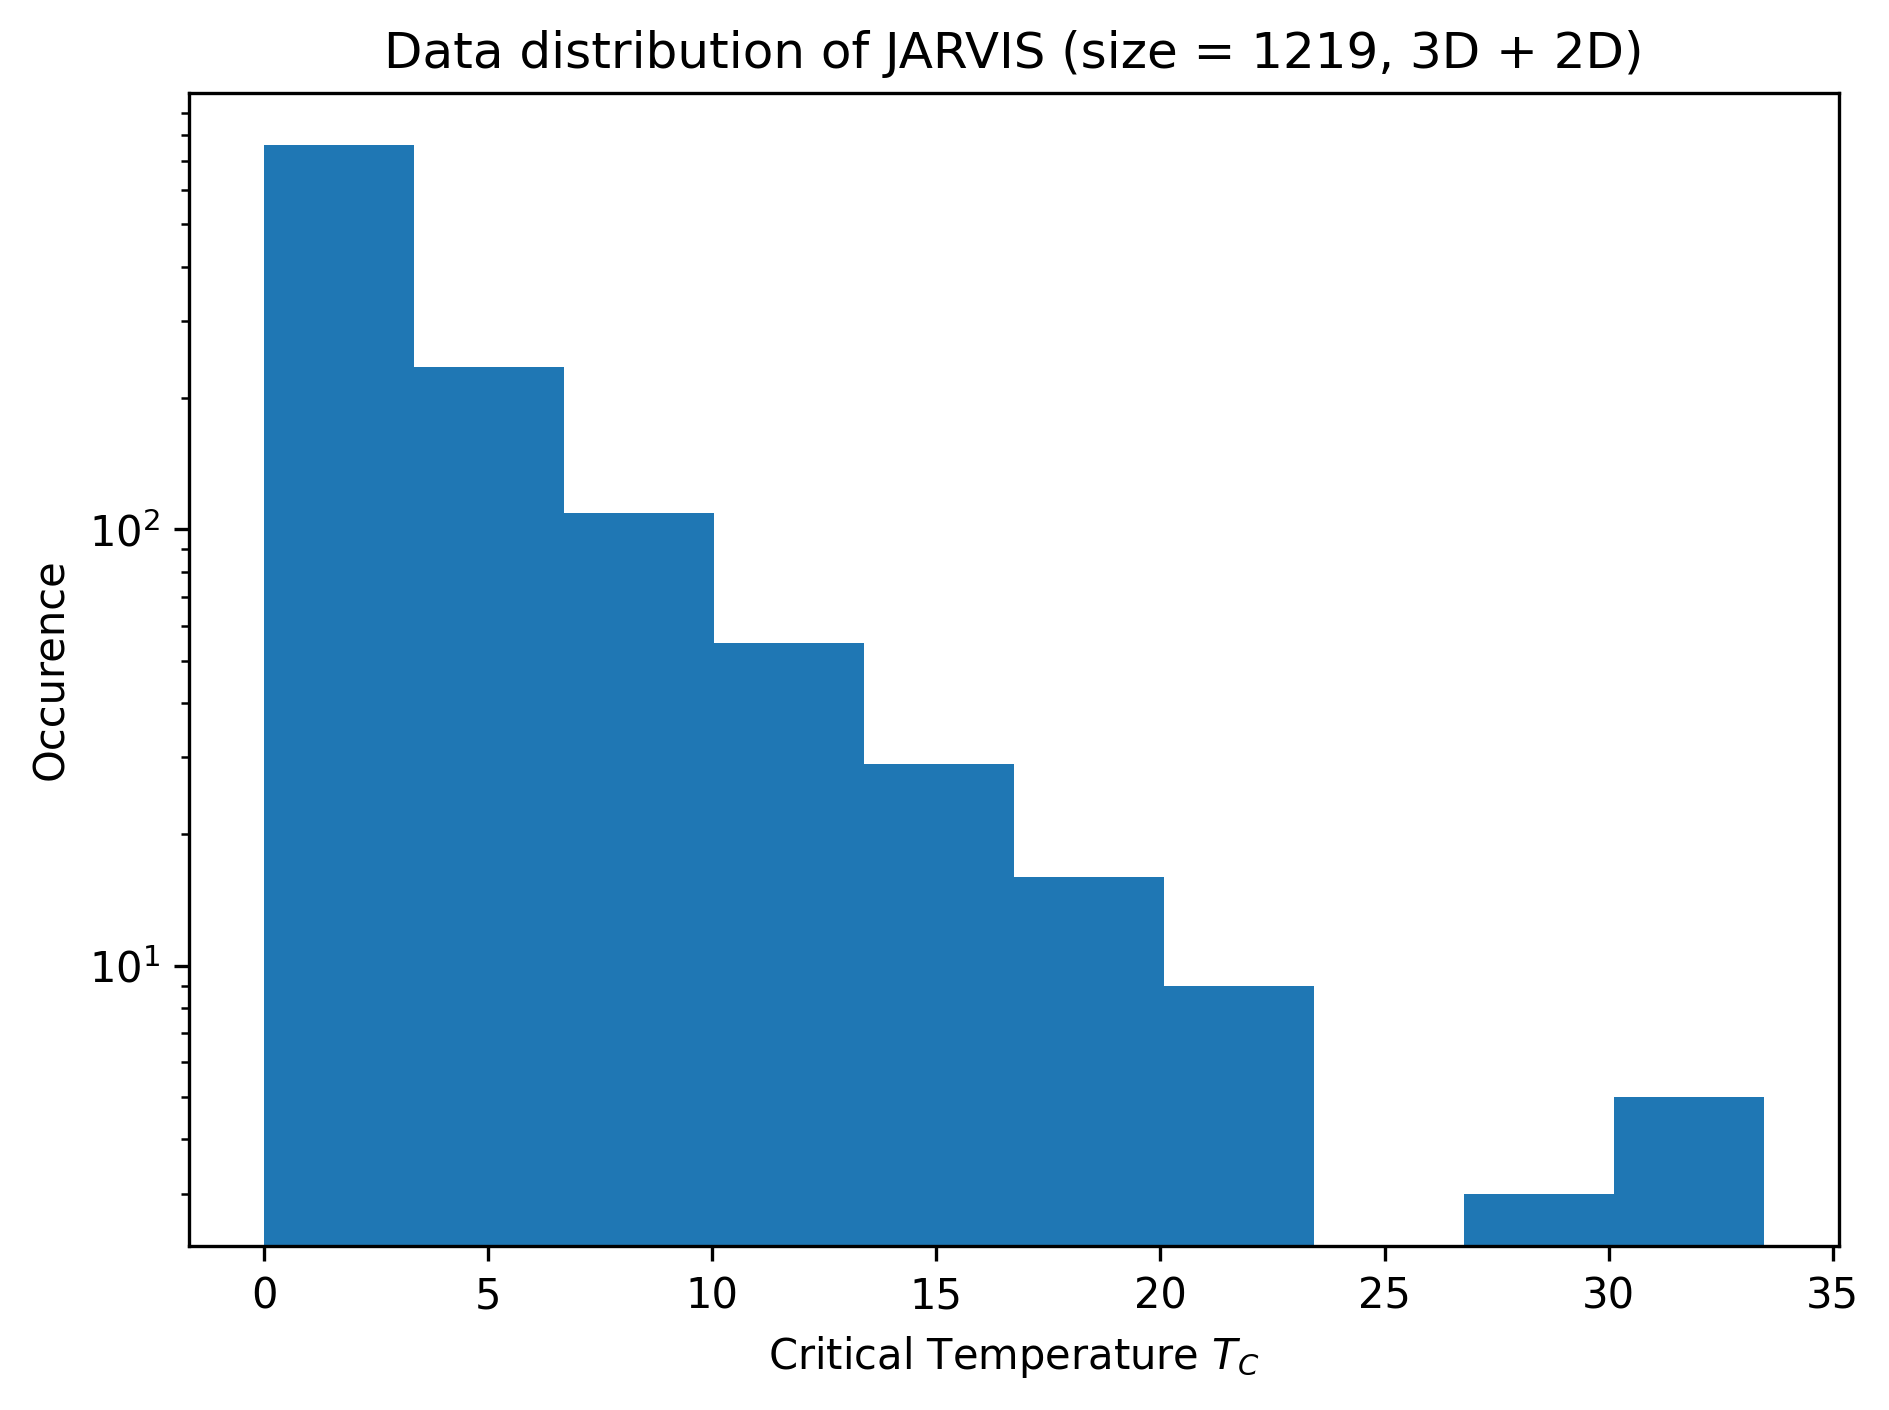

In [71]:
plt.figure(dpi=300)
plt.hist(df['Tc'])
plt.yscale('log')
plt.xlabel('Critical Temperature $T_C$')
plt.ylabel('Occurence')
plt.title('Data distribution of JARVIS (size = 1219, 3D + 2D)')
plt.tight_layout()
plt.savefig('figure/jarvis-hist.png', facecolor='white')

In [72]:
# Convert Crystal Structures
# From Jarvis dict to CIF

from jarvis.core.atoms import Atoms
from pymatgen.io.jarvis import JarvisAtomsAdaptor
from pymatgen.io.cif import CifWriter

jarvis_obj_list = [Atoms.from_dict(df_3d.loc[i, 'atoms']) for i in range(df_3d.shape[0])]
pymatgen_obj_list = [JarvisAtomsAdaptor().get_structure(jarvis_obj) for jarvis_obj in jarvis_obj_list]
cif_list = [CifWriter(pymatgen_obj) for pymatgen_obj in pymatgen_obj_list]

In [73]:
df_3d['cif'] = cif_list

In [74]:
type(cif_list[0])

pymatgen.io.cif.CifWriter

In [75]:
df_3d['material_id'] = range(df_3d.shape[0])
df_3d

,stability,jid,atoms,cfid,wlog,lamb,Tc,a2F,a2F_original_x,a2F_original_y,press,cif,material_id
0,stable,JVASP-1014,"{'lattice_mat': [[-1.6403925360888891, 1.64039...","[8309.949999999999, 5731.3657, 3.1, -170.09788...",164.9922,0.7572,7.639509,"[5.42634e-07, 5.8827651243809176e-05, 0.000979...","[0.214525123114465, 0.6435753693433951, 1.0726...","[5.42634e-07, 1.4651100000000003e-05, 6.782930...",0 GPa,# generated using pymatgen\ndata_Ta\n_symmetry...,0
1,unstable,JVASP-11981,"{'lattice_mat': [[5.141958289239183, 0.0, 0.0]...","[5382.325, 3904.70355, 6.854999999999999, -49....",45.1237,3.6413,8.956446,"[0.195860917740093, 0.265141201210157, 0.36811...","[-15.478522404671136, -14.363127277228655, -13...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.82251000...",0 GPa,# generated using pymatgen\ndata_Nb3Al\n_symme...,1
2,stable,JVASP-1378,"{'lattice_mat': [[3.126741201440278, 0.0, 0.0]...","[4267.4, 3651.8215, 1.663, -18.188456, 0.0, 20...",630.1760,0.3011,0.610057,"[7.454790000000001e-08, 7.454790000000001e-08,...","[1.025522688868179, 3.076574869453571, 5.12762...","[7.454790000000001e-08, 2.0128e-06, 9.31851e-0...",0 GPa,# generated using pymatgen\ndata_ScB2\n_symmet...,2
3,stable,JVASP-14492,"{'lattice_mat': [[4.191900863927402, 0.0, 0.0]...","[3664.3849999999998, 2553.7511, 6.42, -40.3578...",322.0491,0.4618,3.593415,"[1.06239e-06, 4.3661141590156885e-06, 2.148085...","[0.8069661974167881, 2.420902673959784, 4.0348...","[1.06239e-06, 2.8684500000000003e-05, 0.000158...",0 GPa,# generated using pymatgen\ndata_NbO\n_symmetr...,3
4,stable,JVASP-14601,"{'lattice_mat': [[0.0, 3.266572916697213, 3.26...","[4168.75, 2875.0715, 5.365, -102.4199999999999...",108.2536,0.2540,0.020680,"[1.71198e-06, 0.0005839276442280001, 0.0045549...","[0.23227783795085102, 0.6968321532827471, 1.16...","[1.71198e-06, 4.62237e-05, 0.000870168, 0.0021...",0 GPa,# generated using pymatgen\ndata_Sn\n_symmetry...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,unstable,JVASP-93811,"{'lattice_mat': [[5.302134985728254, 0.0, 0.0]...","[5205.777999999999, 3496.9797500000004, 2.7473...",154.0031,0.4924,2.193986,"[0.011431726573195002, 0.013165882372648001, 0...","[-49.658348914883135, -46.444410917756244, -43...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 GPa,# generated using pymatgen\ndata_Zr2TaN3\n_sym...,1053
1054,stable,JVASP-94831,"{'lattice_mat': [[4.173847040657655, 0.0, 0.0]...","[3440.0, 2927.7881500000003, 0.9693, -30.05050...",654.5146,0.2027,0.004579,"[3.12449e-06, 3.12449e-06, 1.5222246162955021e...","[1.541022180038031, 4.623080145812161, 7.70512...","[3.12449e-06, 8.436150000000001e-05, 0.0006193...",0 GPa,# generated using pymatgen\ndata_SrB6\n_symmet...,1054
1055,stable,JVASP-95036,"{'lattice_mat': [[1.757208959427206, -6.674163...","[4237.15, 3366.8218, 3.682, -26.62625, 0.0, 30...",377.8391,0.2286,0.019051,"[1.8938100000000002e-07, 1.803319281097398e-06...","[0.6040276867752431, 1.812088502604957, 3.0201...","[1.8938100000000002e-07, 5.1133e-06, 3.2095400...",0 GPa,# generated using pymatgen\ndata_TiSi2\n_symme...,1055
1056,unstable,JVASP-97358,"{'lattice_mat': [[3.596593711864312, -1.918927...","[3382.186666666667, 2789.2551666666664, 7.5443...",102.5157,0.8977,6.482675,"[0.033592328720824, 0.043477739974769, 0.05234...","[-3.090126144727208, 0.8590270404961481, 4.808...","[0.00252703, 0.0422282, 0.07723229999999999, 0...",0 GPa,# generated using pymatgen\ndata_YCI\n_symmetr...,1056


In [76]:
train, val_test = train_test_split(df_3d, test_size=0.2 ,random_state=42)
val, test = train_test_split(val_test, test_size=0.5 ,random_state=42)
print(train.shape)
print(val.shape)
print(test.shape)

(846, 13)
(106, 13)
(106, 13)


In [77]:
train.to_csv('flowmm/data/jarvis_3d/train.csv')
val.to_csv('flowmm/data/jarvis_3d/val.csv')
test.to_csv('flowmm/data/jarvis_3d/test.csv')